In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [2]:
import tarfile
import numpy as np
import pickle
import os
import cv2

In [3]:
file_path = '/kaggle/input/cifar10-python/cifar-10-python.tar.gz' 
extracted_path = '/kaggle/working/cifar-10-batches-py'

In [4]:
# Extraction du fichier tar.gz 
with tarfile.open(file_path, 'r:gz') as tar: tar.extractall(path='/kaggle/working')

In [5]:
def load_cifar_batch(batch_filename): 
    with open(batch_filename, 'rb') as file: 
        batch = pickle.load(file, encoding='latin1') 
    data = batch['data'] 
    labels = batch['labels']
    return data,labels

In [6]:
# exemple
data,labels=load_cifar_batch("/kaggle/working/cifar-10-batches-py/data_batch_2")
data[0]

array([ 35,  27,  25, ..., 169, 168, 168], dtype=uint8)

In [7]:
data[0].shape
# # Pour les données CIFAR-10, chaque image est initialement stockée sous forme aplatie en 
# une seule dimension, et toutes les images sont concaténées ensemble dans un tableau 2D 
# de forme (nombre_d_images, 3072)

(3072,)

In [8]:
def redimensionner_et_gray(data, labels):
    # Redimensionnement et transposition des données
    data = data.reshape((-1, 3, 32, 32))  # Reshape en (nombre_d_images, canaux, hauteur, largeur)
    data = data.transpose(0, 2, 3, 1)     # Transposition en (nombre_d_images, hauteur, largeur, canaux)

    # Conversion des images en niveaux de gris et aplatissement en 1D
    data_gray_1D = []
    for img in data:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Conversion en niveaux de gris
        gray_1D = gray.flatten()  # Aplatissement en 1D
        data_gray_1D.append(gray_1D)

    return np.array(data_gray_1D), labels

In [9]:
import matplotlib.pyplot as plt

def show_examples(data, labels):
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        gray_image = data[i].reshape(32, 32)  # Remodeler les images en 32x32 pour l'affichage car on utilise flatten 
        plt.imshow(gray_image, cmap='gray', interpolation='nearest')
        plt.title(labels[i])
        plt.axis('off') 
    plt.tight_layout()
    plt.show()

            

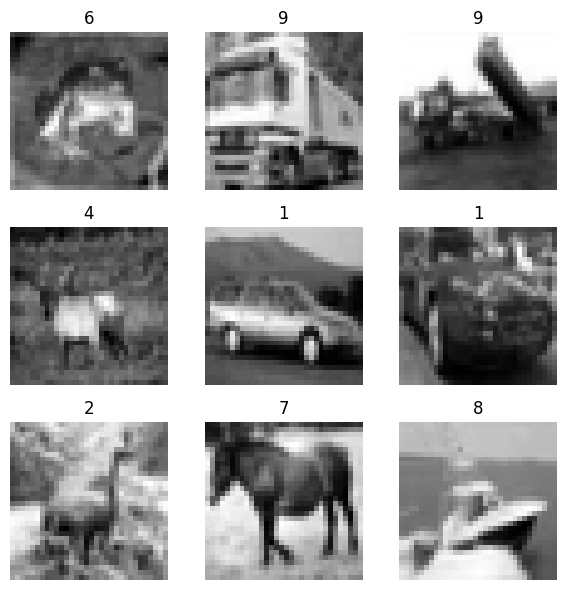

In [10]:
data,labels=load_cifar_batch("/kaggle/working/cifar-10-batches-py/data_batch_1")
data,labels=redimensionner_et_gray(data,labels)
show_examples(data,labels)



In [11]:
data.shape

(10000, 1024)

In [12]:
sett=set(labels)

In [13]:
sett

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [14]:
#dans chaque batch afficher pour chaque classe nmbr de image pour chaque label
def countt(data, labels):
    l = [0 for _ in range(10)]  # Initialisation de la liste de compteurs pour les 10 classes
    for label in labels:
        l[label] += 1
    return l


In [15]:
countt(data, labels)

[1005, 974, 1032, 1016, 999, 937, 1030, 1001, 1025, 981]

**pour mon modéle je vais utiliser 2 batch**

In [16]:

# Charger les batches de données
batch1 = "/kaggle/working/cifar-10-batches-py/data_batch_1"
batch2 = "/kaggle/working/cifar-10-batches-py/data_batch_2"

data1, labels1 = load_cifar_batch(batch1)
data2, labels2 = load_cifar_batch(batch2)

# Redimensionner et convertir les données en niveaux de gris 1D
data1, labels1 = redimensionner_et_gray(data1, labels1)
data2, labels2 = redimensionner_et_gray(data2, labels2)

# Vérifier l'équilibre des labels dans les données
print("Nombre d'images dans le batch 1 pour chaque label:", countt(data1, labels1))
print("Nombre d'images dans le batch 2 pour chaque label:", countt(data2, labels2))


Nombre d'images dans le batch 1 pour chaque label: [1005, 974, 1032, 1016, 999, 937, 1030, 1001, 1025, 981]
Nombre d'images dans le batch 2 pour chaque label: [984, 1007, 1010, 995, 1010, 988, 1008, 1026, 987, 985]


**Voir les images pour chaque label**

In [17]:
def show_one_image_per_label(data, labels):
    plt.figure(figsize=(10, 10)) 
    displayed_labels = [False] * 10 # Suivi des labels déjà affichés
    count = 0 
    for i in range(len(labels)):
        label = labels[i]
        if not displayed_labels[label]: # Vérifier si l'image de ce label a déjà été affichée 
            plt.subplot(3, 3, count + 1) 
            plt.imshow(data[i].reshape(32,32), interpolation='nearest',cmap='gray') 
            print(label)
            plt.axis('off')
            displayed_labels[label] = True 
            count += 1 
        if count == 9: # Arrêter après avoir affiché 9 images
            break 
        plt.tight_layout() 
        plt.show()

1


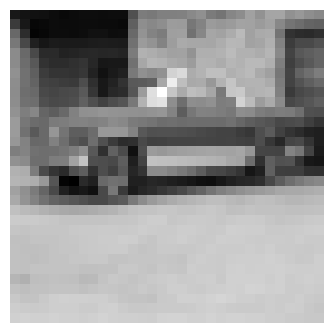

6


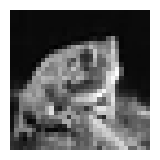

<Figure size 640x480 with 0 Axes>

8


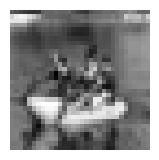

<Figure size 640x480 with 0 Axes>

3


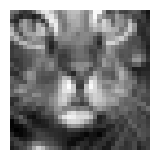

4


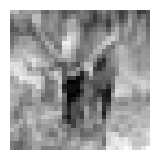

<Figure size 640x480 with 0 Axes>

0


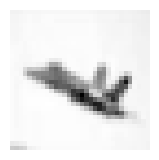

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

5


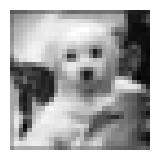

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

2


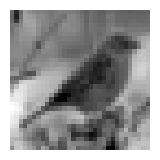

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

7


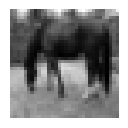

In [18]:
show_one_image_per_label(data2, labels2)

In [19]:
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

In [20]:
print("Valeurs avant normalisation (exemple):", data1[0][:10]) # Affiche les 10 premières valeurs de la première image
print("min",data1[0].min())
print("max",data1[0].max())

Valeurs avant normalisation (exemple): [ 62  45  47  52  70  86 101 105 112 115]
min 0
max 247


In [21]:
# Fonction pour normaliser une image
def normaliser(data): 
    # Normaliser les images
    data = np.array([img/255.0 for img in data])
    return data

In [22]:
# Normaliser toutes les images dans data1 et data2
data2=normaliser(data2)
data1=normaliser(data1)


In [23]:
data1[0]
print("min",data1[0].min())
print("max",data1[0].max())

min 0.0
max 0.9686274509803922


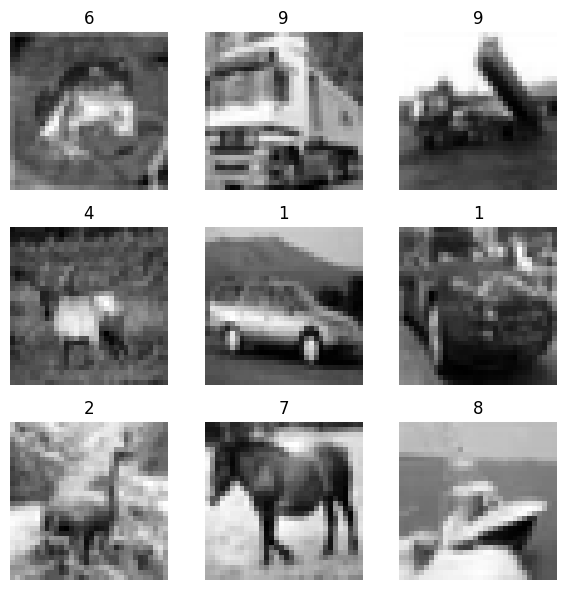

In [24]:
show_examples(data1,labels1)

**Model**

In [25]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping


In [26]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

# Définir le modèle CNN
input_img = Input(shape=(32, 32, 1))  # Note: Les images sont en niveaux de gris

# Couches de convolution et de pooling
x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Flatten()(x)

# Couches entièrement connectées avec Dropout
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # 10 classes pour CIFAR-10

# Définir et compiler le modèle
model = Model(inputs=input_img, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
from sklearn.model_selection import train_test_split
# Combinez data1 et data2 
data = np.concatenate((data1, data2), axis=0)
labels = np.concatenate((labels1, labels2), axis=0)
# Adapter les dimensions des données pour correspondre aux entrées du modèle 
data = data.reshape(data.shape[0], 32, 32, 1) # Diviser les données en ensembles d'entraînement et de validation 
data_train, data_val, labels_train, labels_val = train_test_split( data, labels, test_size=0.2, random_state=42)

In [29]:
# Ajout des callbacks Early Stopping et Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
checkpoint_filepath = '/kaggle/working/.{epoch:02d}-{val_loss:.2f}.keras'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [30]:
# Entraîner le modèle
history = model.fit(data_train, labels_train,
                    validation_data=(data_val, labels_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100


I0000 00:00:1731599971.260861    6776 service.cc:145] XLA service 0x7c2270007110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731599971.260914    6776 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 42/500 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1311 - loss: 3.9009

I0000 00:00:1731599976.765711    6776 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


486/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2052 - loss: 3.2390
Epoch 1: val_loss improved from inf to 4.08783, saving model to /kaggle/working/.01-4.09.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2065 - loss: 3.2305 - val_accuracy: 0.1705 - val_loss: 4.0878
Epoch 2/100
495/500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3455 - loss: 2.4551
Epoch 2: val_loss improved from 4.08783 to 2.05915, saving model to /kaggle/working/.02-2.06.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3458 - loss: 2.4537 - val_accuracy: 0.4392 - val_loss: 2.0592
Epoch 3/100
492/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4554 - loss: 2.0563
Epoch 3: val_loss improved from 2.05915 to 1.89468, saving model to /kaggle/working/.03-1.89.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4556 - loss: 2.0553 - val_accuracy: 0.5025 - val_loss: 1.8947
Epoch 4/100
490/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5231 - loss: 1.8329
Epoch 4: val_loss i

In [31]:
# Évaluer le modèle
loss, accuracy = model.evaluate(data_val, labels_val)
print(f'Loss: {loss}, Accuracy: {accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - loss: 1.7865
Loss: 1.7622922658920288, Accuracy: 0.6524999737739563


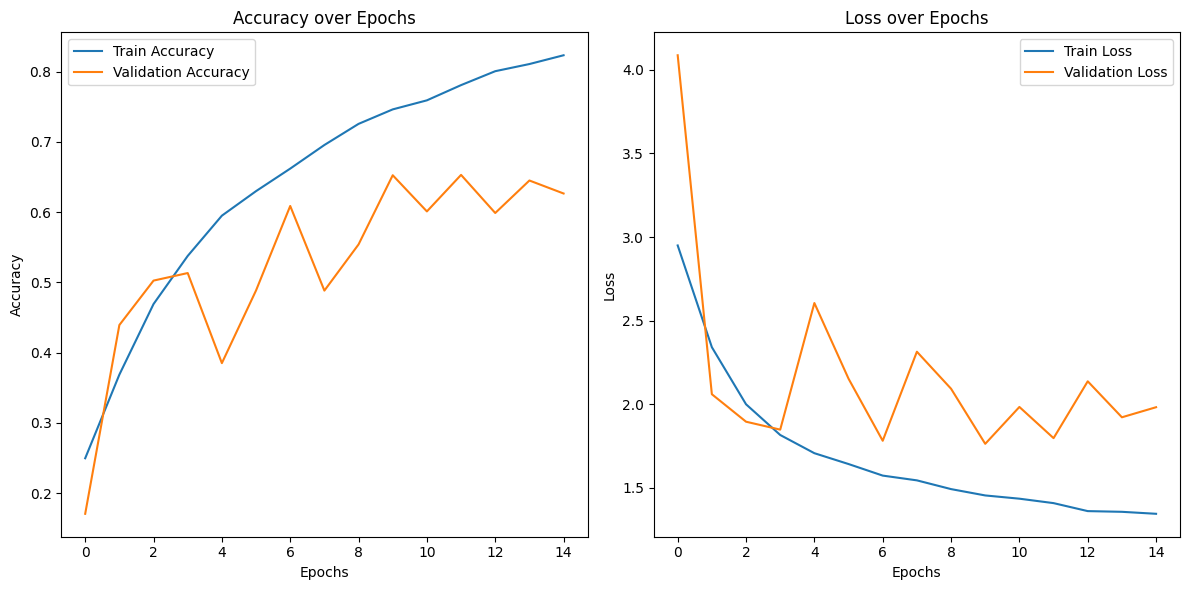

In [32]:
import matplotlib.pyplot as plt

# Fonction pour tracer les graphes de précision et de perte
def plot_accuracy_loss(history):
    # Tracer la précision d'entraînement et de validation
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Tracer la perte d'entraînement et de validation
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Appeler la fonction pour afficher les graphes
plot_accuracy_loss(history)


**faire meme etapes pour test images**

In [33]:
test_batch="/kaggle/working/cifar-10-batches-py/test_batch"

In [36]:
# Charger les batches de données de test
data_test, label_test = load_cifar_batch(test_batch)

# Redimensionner et convertir les données en niveaux de gris 1D
data_test, label_test = redimensionner_et_gray(data_test, label_test)

# Normaliser les données de test
data_test = normaliser(data_test)  # Assurez-vous de normaliser data_test

# Redimensionner les données de test pour correspondre à l'entrée du modèle
data_test = data_test.reshape(data_test.shape[0], 32, 32, 1)

# Assurez-vous que les étiquettes de test sont de type int
label_test = np.array(label_test, dtype='int')

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(data_test, label_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6540 - loss: 1.7727
Test Loss: 1.7817002534866333, Test Accuracy: 0.6463000178337097


In [37]:
# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(data_test,label_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6540 - loss: 1.7727
Test Loss: 1.7817002534866333, Test Accuracy: 0.6463000178337097


**Tester sur une image**

In [38]:
d, l = load_cifar_batch("/kaggle/working/cifar-10-batches-py/data_batch_3")

In [49]:
# Charger les données et les étiquettes du lot
data_batch_3, labels_batch_3 = load_cifar_batch("/kaggle/working/cifar-10-batches-py/data_batch_3")

# Choisir une image et l'étiquette associée
test_index = 70 # Vous pouvez changer cet index pour tester une autre image
test_image = data_batch_3[test_index]
test_label = labels_batch_3[test_index]

# Redimensionner et normaliser l'image
test_image = test_image.reshape(32, 32, 3)  # Reshape pour 32x32x3 (canaux RGB)
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)  # Convertir en niveaux de gris
test_image = cv2.resize(test_image, (32, 32))  # Assurez-vous que la taille est correcte
test_image = test_image.astype('float32') / 255.0  # Normaliser l'image
test_image = test_image.reshape(1, 32, 32, 1)  # Reshape pour correspondre à l'entrée du modèle

# Assurez-vous que l'étiquette est un entier
test_label = np.array(test_label, dtype='int')


In [50]:
# Faire une prédiction sur l'image de test
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# Afficher les résultats
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']
print(f'Predicted class: {class_names[predicted_class]}')
print(f'Actual class: {class_names[test_label]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: avion
Actual class: avion
